In [16]:
from matplotlib import pyplot as plt
import numpy as np
import tqdm
import cv2
import sc2

%pylab inline

sc2.utils.jit.enable()
sc2.utils.imageio.configurate("default_show_mode", "plt")

Populating the interactive namespace from numpy and matplotlib


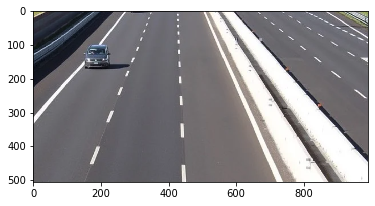

In [27]:
# let start from an image named "road"
image = sc2.utils.image_load("road")
# well, the original image is too large
image = cv2.resize(image, dsize=None, fx=0.6, fy=0.6)
# have a look at the original image
sc2.utils.image_show(image)

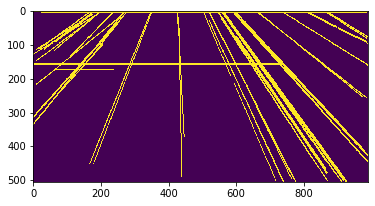

In [31]:
# have a look at the edges detected by hough
sc2.utils.image_show(sc2.energy.hough(image, threshold=75))

In [18]:
# backup the original image first
backup = np.copy(image)

In [19]:
# decide how many seams to remove
steps = int(image.shape[1] * 0.4)

100%|██████████| 396/396 [00:23<00:00, 17.11it/s]


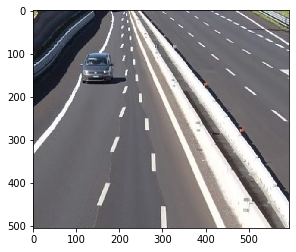

In [20]:
image = np.copy(backup)
# remove seams normally
for i in tqdm.tqdm(range(steps)):
    energy = sc2.energy.laplacian(image)
    seam = sc2.seamops.detect_seam(energy)
    image = sc2.seamops.remove_seam(image, seam)
# have a look
sc2.utils.image_show(image)

100%|██████████| 396/396 [00:25<00:00, 15.57it/s]


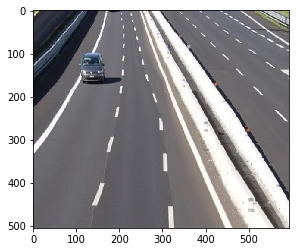

In [36]:
image = np.copy(backup)
# remove seams with edge protection method
edges = sc2.energy.hough(image)
delta = np.zeros(image.shape[:2])
for i in tqdm.tqdm(range(steps)):
    energy = sc2.energy.laplacian(image) + delta * 100
    energy = sc2.utils.min_max_normalization(energy)
    seam = sc2.seamops.detect_seam(energy)
    mask = sc2.energy.seam_to_mask(energy.shape, seam)
    mask = mask * (edges != 0)
    cirs = sc2.energy.circles(mask, r=3)
    delta = delta + cirs
    image = sc2.seamops.remove_seam(image, seam)
    edges = sc2.seamops.remove_seam(edges, seam)
    delta = sc2.seamops.remove_seam(delta, seam)
# have a look
sc2.utils.image_show(image)

In [ ]:
# as you can see, the lines and edges are preserved better compared to the former one